In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-08-16 16:03:34.798144: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-16 16:03:35.050212: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-16 16:03:35.051484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 16:03:36.429384: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train , y_train) ,(X_test , y_test) = keras.datasets.mnist.load_data()
print(X_train)
print(y_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]


In [3]:
print(X_train.shape , y_train.shape)

(60000, 28, 28) (60000,)


5


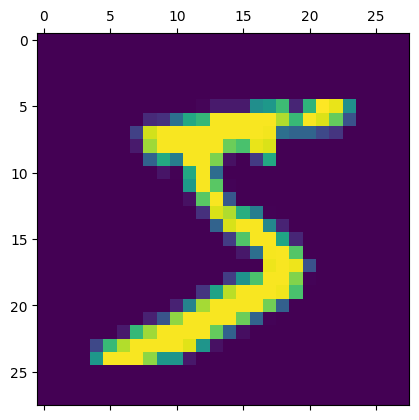

In [4]:
plt.matshow(X_train[0])
print(y_train[0])

In [5]:
X_train = X_train / 250
X_test = X_test / 250

In [6]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [7]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(10 , activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    X_train_flattened,
    y_train,
    epochs=5
)

Epoch 1/5


2023-08-16 16:03:39.523307: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4672 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9251


In [8]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.28104277e-02, 2.08157687e-07, 5.42427488e-02, 9.70179498e-01,
       2.43243948e-03, 1.17297806e-01, 1.48489221e-06, 9.99869287e-01,
       9.42764133e-02, 7.51857221e-01], dtype=float32)

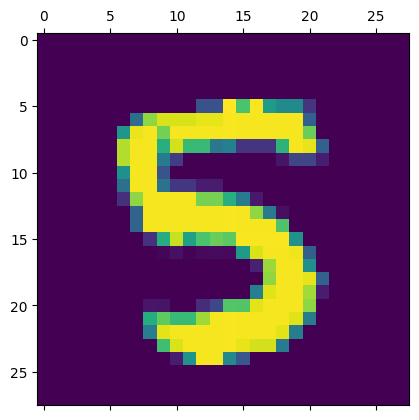

In [9]:
plt.matshow(X_test[120])

In [10]:
np.argmax(y_predicted[120])

5

In [11]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [12]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [13]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 946,    0,    3,    4,    0,    7,   12,    4,    3,    1],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   3,    9,  922,   17,    6,    5,   13,   11,   41,    5],
       [   0,    0,   16,  926,    0,   23,    2,   13,   22,    8],
       [   1,    1,    5,    2,  894,    0,   15,    7,   10,   47],
       [   7,    1,    4,   34,    9,  773,   13,    9,   35,    7],
       [   6,    3,    5,    1,    6,   10,  922,    2,    3,    0],
       [   1,    5,   23,    4,    3,    0,    0,  965,    2,   25],
       [   3,    7,    7,   24,    9,   21,    8,   15,  872,    8],
       [   8,    6,    1,    9,   18,    7,    1,   30,    8,  921]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

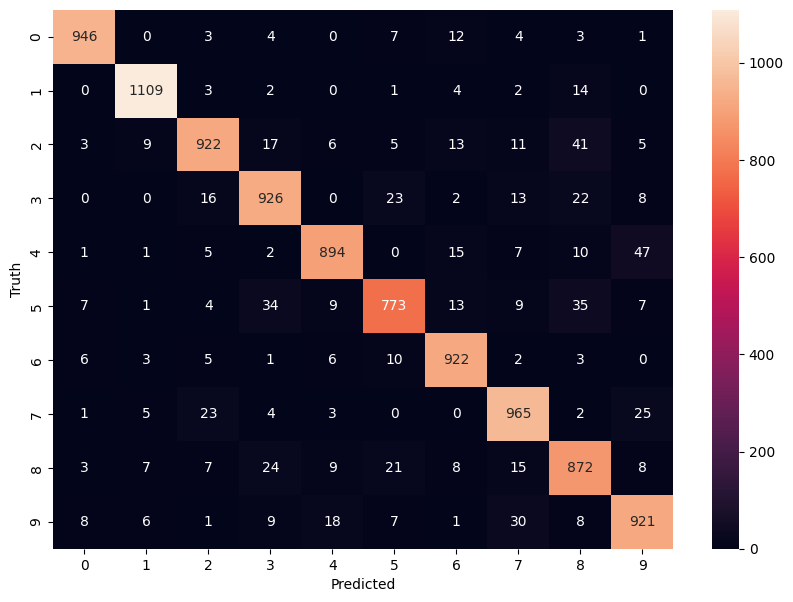

In [14]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(100 , activation="relu"),
    tf.keras.layers.Dense(10 , activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    X_train_flattened,
    y_train,
    epochs=5
)

Epoch 1/5


2023-08-16 16:03:57.254395: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2715 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1240 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0865 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0669 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0520 - accuracy: 0.9835


In [16]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0801 - accuracy: 0.9766


[0.08013102412223816, 0.9765999913215637]

Text(95.72222222222221, 0.5, 'Truth')

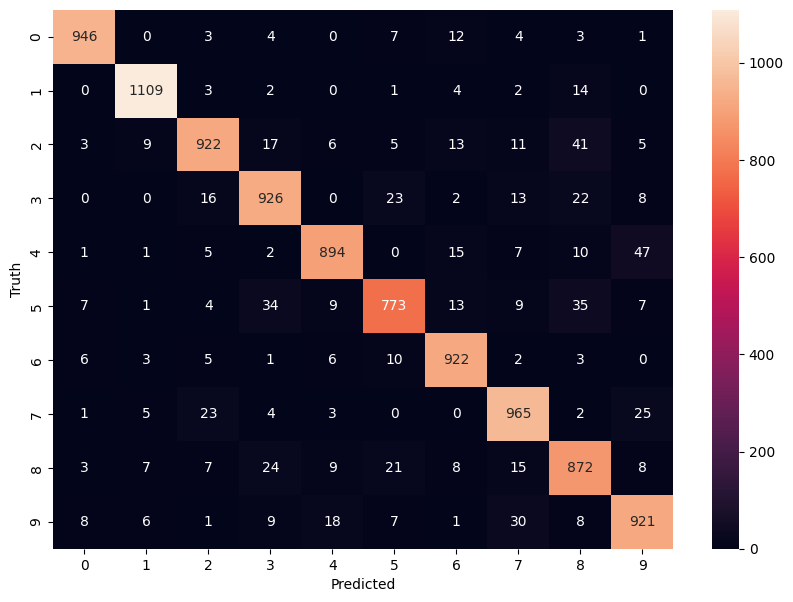

In [17]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100 , activation="relu"),
    tf.keras.layers.Dense(10 , activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    X_train,
    y_train,
    epochs=15
)

Epoch 1/15


2023-08-16 16:04:20.985583: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2827 - accuracy: 0.9194
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1282 - accuracy: 0.9627
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0889 - accuracy: 0.9732
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0678 - accuracy: 0.9794
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9833
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0423 - accuracy: 0.9868
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.9894
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0285 - accuracy: 0.9914
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - accuracy: 0.9924
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0199 - accurac

CNN

In [19]:
from keras import models , layers


In [20]:
CNN = models.Sequential([
    #cnn
    layers.Reshape((28, 28, 1)),
    layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu' , input_shape=(28,28)),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(32 , activation='relu'),
    layers.Dense(10 , activation='softmax')
])

CNN.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

CNN.fit( X_train , y_train , epochs=10)

Epoch 1/10


2023-08-16 16:05:26.494772: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 18s 9ms/step - loss: 0.1878 - accuracy: 0.9443
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0683 - accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0488 - accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0374 - accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0283 - accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0220 - accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0171 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0129 - accuracy: 0.9962
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0101 - accuracy: 0.9966
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0092

In [21]:
CNN.evaluate(X_test , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0529 - accuracy: 0.9844


[0.05288626253604889, 0.9843999743461609]

In [22]:
y_predicted = CNN.predict(X_test)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([6.16995130e-14, 2.43534533e-12, 1.01048635e-10, 9.90720324e-08,
       2.87749832e-14, 1.42411385e-15, 6.67889149e-23, 9.99999821e-01,
       7.29527905e-09, 1.06831884e-10], dtype=float32)

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    1,    0,    0,    0,    1,    1,    3,    0],
       [   0, 1132,    0,    0,    0,    0,    1,    1,    1,    0],
       [   2,    7, 1003,    5,    1,    0,    1,    9,    4,    0],
       [   0,    0,    0, 1002,    0,    4,    0,    1,    3,    0],
       [   0,    0,    1,    0,  965,    0,    2,    0,    1,   13],
       [   2,    0,    0,   12,    0,  876,    2,    0,    0,    0],
       [   5,    3,    0,    1,    1,    3,  942,    0,    3,    0],
       [   0,    2,    6,    2,    0,    0,    0, 1012,    2,    4],
       [   3,    1,    1,    6,    0,    1,    0,    2,  956,    4],
       [   1,    0,    1,    6,    7,    4,    0,    3,    4,  983]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

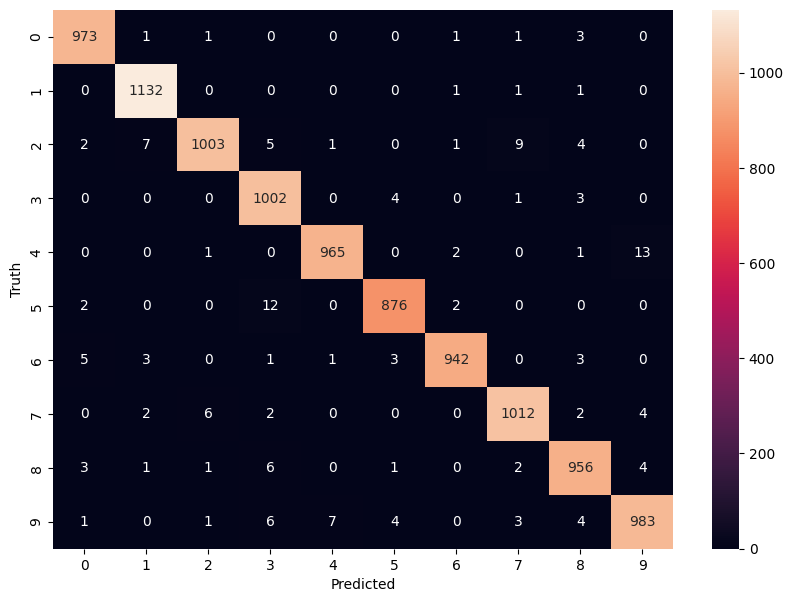

In [25]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
import joblib


In [31]:
joblib.dump(CNN , "no_predict_cnn")

['no_predict_cnn']

In [33]:
cnn = joblib.load("no_predict_cnn")

In [35]:
cnn.predict(X_test)

313/313 [==============================] - 1s 3ms/step


array([[6.16995130e-14, 2.43534533e-12, 1.01048635e-10, ...,
        9.99999821e-01, 7.29527905e-09, 1.06831884e-10],
       [2.83047280e-10, 2.64575789e-07, 9.99999702e-01, ...,
        1.28085785e-18, 1.96802488e-11, 3.14697053e-11],
       [3.91266894e-08, 9.99925911e-01, 3.05448076e-08, ...,
        4.40752274e-06, 6.19374186e-05, 7.89899313e-10],
       ...,
       [4.05685226e-19, 2.41455781e-13, 3.11665519e-15, ...,
        2.48339218e-12, 2.41079874e-07, 2.08138129e-08],
       [2.04471355e-17, 2.97843618e-13, 8.57252241e-16, ...,
        1.28539445e-11, 7.29109559e-07, 1.39349361e-13],
       [4.69913720e-14, 1.67406427e-16, 1.15484792e-11, ...,
        3.18147097e-17, 1.91063332e-10, 2.65517216e-14]], dtype=float32)